# Download and process metal-associated proteins from PDB

We want to perform analyses on proteins that are associated to metals. This means that the metal attaches somewhere in the protein structure (aka a ligand in the structure).

To create a dataset, we first download the protein IDs from the  [MetalDB](https://metalpdb.cerm.unifi.it/metalSearch) website. Then we use [RPDB](https://www.rcsb.org/) to get the data about those proteins.

## Get proteins associated with metals

You can download the proteins associated with any metal on the periodic table via [MetalDB](https://metalpdb.cerm.unifi.it/metalSearch). The data downloads into TSV files. Every atom has its own TSV file.

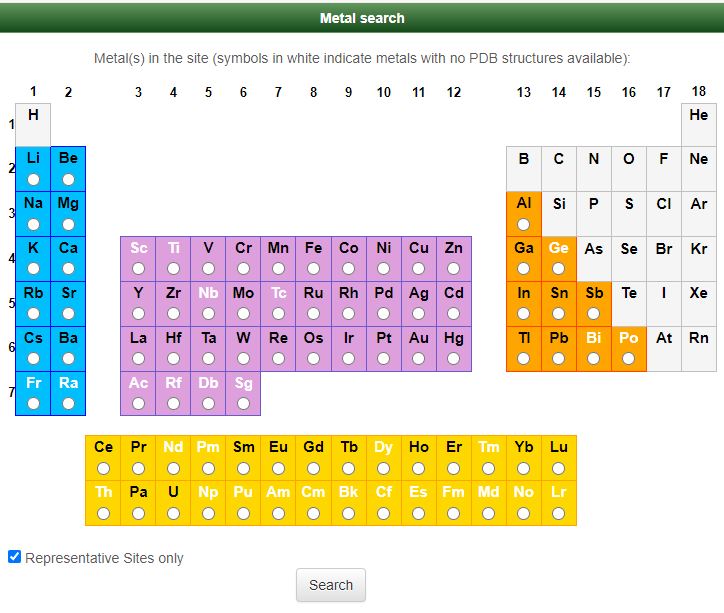


In [1]:
import pandas as pd
from glob import glob

In [2]:
import atomium

from tqdm import tqdm

tqdm.pandas()

In [3]:
glob("metals/metalpdb*.tsv")

['metals/metalpdb_report_ni.tsv',
 'metals/metalpdb_report_na.tsv',
 'metals/metalpdb_report_mg.tsv',
 'metals/metalpdb_report_cu.tsv',
 'metals/metalpdb_report_ba.tsv',
 'metals/metalpdb_report_fe.tsv',
 'metals/metalpdb_report_ca.tsv',
 'metals/metalpdb_report_zinc.tsv',
 'metals/metalpdb_report_li.tsv',
 'metals/metalpdb_report_co.tsv',
 'metals/metalpdb_report_al.tsv',
 'metals/metalpdb_report_k.tsv']

In [4]:
df_metals = pd.DataFrame()

for file in glob("metals/metalpdb*.tsv"):
    
    df = pd.read_csv("metals/metalpdb_report_ca.tsv", sep="\t")
    
    df_metals = pd.concat([df_metals, df])

In [5]:
df_metals

,Site Id,Metals,Metals Info,Ligands
0,3ckc_1,Ca;,CA_600(A)_CA;,"GLN_288(A), ASP_430(A), ASP_432(A) PEG_800(A),..."
1,1a0s_1,Ca;,CA_10(P)_CA;,"ASN_454(P), ALA_457(P), LEU_462(P);"
2,1a25_1,Ca;Ca;,CA_290(B)_CA;CA_291(B)_CA;CA_292(B)_CA;,"ASP_187(B), ASP_193(B), ASP_246(B), TRP_247(B)..."
3,1a25_2,Ca;Ca;,CA_290(A)_CA;CA_291(A)_CA;CA_292(A)_CA;,"ASP_187(A), ASP_193(A), ASP_246(A), TRP_247(A)..."
4,1a4v_2,Ca;,CA_125(A)_CA;,"THR_38(A), LEU_81(A), ASP_83(A);"
...,...,...,...,...
4511,5ta1_1,Ca;,CA_702(A)_CA;,"ASP_430(A), ASN_587(A), PHE_588(A), GLY_590(A)..."
4512,5ta1_2,Ca;,CA_701(A)_CA;,HOH_876(A);
4513,5ta1_3,Ca;,CA_703(A)_CA;,"THR_424(A) HOH_831(A), HOH_873(A), HOH_980(A),..."
4514,5trq_4,Ca;,CA_306(A)_CA;,"GLU_198(A), SER_239(B), ASN_267(A) HOH_540(A);"


In [6]:
df_metals = df_metals.drop_duplicates()

In [7]:
df_metals["Metals"].unique()

array(['Ca;', 'Ca;Ca;', 'Ca;Ca', 'Na;Ca', 'Ca;Na', 'Ca;Fe', 'Ca;Mg;',
       'Cd;Ca', 'Ca;Ca;Ca;Ca;Ca;', 'Ca;Zn', 'Ca;Mg', 'Ca;Ca;Ca;', 'Mg;Ca',
       'Mg;Ca;Ca;Ca;Ca;', 'Ca;W', 'V;', 'Ca;Ca;Ca;Ca;', 'Ca;Mn', 'Ca;Cd',
       'Mg;Ca;Ca;Ca;Ca;Ca', 'Ca;Ca;Ca;Ca;Ca;Ca', 'Na;Ca;', 'Zn;Ca',
       'Ca;Na;', 'Fe;Ca', 'Mg;Ca;', 'Ca;Ca;Mg;', 'Ca;Pt', 'Cu;Cu;Cu;Ca;',
       'K;Na;', 'Co;Ca', 'Ca;As', 'Ca;Na;Fe;', 'Ca;K', 'Sm;Ca',
       'Fe;Fe;Ca;', 'Ni;Ca', 'Cu;Ca', 'Ca;Al', 'Ca;Fe;', 'As;Mg;Ca;',
       'Ca;Ca;Na;', 'Ca;Ca;K;', 'Mn;Ca', 'Mg;Mg;', 'Mo;Ca',
       'Mn;Ca;Mn;Mn;', 'Zn;Zn;Ca;', 'Fe;Fe;Na;', 'Mg;Ca;Mg;Ca;Ca;',
       'Na;Ca;Na;', 'Fe;Ca;', 'V;Ca;Ca;Fe;Fe', 'Ca;Mg;Na;',
       'Ca;Ca;Fe;Fe;', 'Li;Li;Ca;Fe;Fe;', 'Cd;Cd;', 'K;', 'Ca;Ni',
       'Ca;Be', 'Ca;Sr', 'Ca;Ca;Na;Na;Na;', 'Ca;Ca;Na;Na;', 'Zn;Na;',
       'Mg;Ca;Mg;Rb;Ca;Rb', 'Mg;Ca;Mg;', 'Fe;Ca;Ca;', 'Ca;Ca;Ca;Mg;Na;',
       'Mn;Mn;', 'Ca;Ca;Ca;Ca;Mg;'], dtype=object)

In [8]:
df_metals

,Site Id,Metals,Metals Info,Ligands
0,3ckc_1,Ca;,CA_600(A)_CA;,"GLN_288(A), ASP_430(A), ASP_432(A) PEG_800(A),..."
1,1a0s_1,Ca;,CA_10(P)_CA;,"ASN_454(P), ALA_457(P), LEU_462(P);"
2,1a25_1,Ca;Ca;,CA_290(B)_CA;CA_291(B)_CA;CA_292(B)_CA;,"ASP_187(B), ASP_193(B), ASP_246(B), TRP_247(B)..."
3,1a25_2,Ca;Ca;,CA_290(A)_CA;CA_291(A)_CA;CA_292(A)_CA;,"ASP_187(A), ASP_193(A), ASP_246(A), TRP_247(A)..."
4,1a4v_2,Ca;,CA_125(A)_CA;,"THR_38(A), LEU_81(A), ASP_83(A);"
...,...,...,...,...
4511,5ta1_1,Ca;,CA_702(A)_CA;,"ASP_430(A), ASN_587(A), PHE_588(A), GLY_590(A)..."
4512,5ta1_2,Ca;,CA_701(A)_CA;,HOH_876(A);
4513,5ta1_3,Ca;,CA_703(A)_CA;,"THR_424(A) HOH_831(A), HOH_873(A), HOH_980(A),..."
4514,5trq_4,Ca;,CA_306(A)_CA;,"GLU_198(A), SER_239(B), ASN_267(A) HOH_540(A);"


In [9]:
ALL_METALS = [
    "Al",
    "As",
    "Be",
    "Ca",
    "Cd",
    "Cu",
    "Fe",
    "K",
    "Li",
    "Mo",
    "Mg",
    "Mn",
    "Na",
    "Ni",
    "Pt",
    "Rb",
    "Sr",
    "Sm",
    "V",
    "Zn",
]

In [10]:
for metal in ALL_METALS:

    df_metals[metal] = df_metals["Metals"].str.contains(metal, case=False)

/tmp/ipykernel_295/1171056544.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_metals[metal] = df_metals["Metals"].str.contains(metal, case=False)


In [11]:
df_metals

,Site Id,Metals,Metals Info,Ligands,Al,As,Be,Ca,Cd,Cu,...,Mg,Mn,Na,Ni,Pt,Rb,Sr,Sm,V,Zn
0,3ckc_1,Ca;,CA_600(A)_CA;,"GLN_288(A), ASP_430(A), ASP_432(A) PEG_800(A),...",False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1a0s_1,Ca;,CA_10(P)_CA;,"ASN_454(P), ALA_457(P), LEU_462(P);",False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1a25_1,Ca;Ca;,CA_290(B)_CA;CA_291(B)_CA;CA_292(B)_CA;,"ASP_187(B), ASP_193(B), ASP_246(B), TRP_247(B)...",False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1a25_2,Ca;Ca;,CA_290(A)_CA;CA_291(A)_CA;CA_292(A)_CA;,"ASP_187(A), ASP_193(A), ASP_246(A), TRP_247(A)...",False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1a4v_2,Ca;,CA_125(A)_CA;,"THR_38(A), LEU_81(A), ASP_83(A);",False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4511,5ta1_1,Ca;,CA_702(A)_CA;,"ASP_430(A), ASN_587(A), PHE_588(A), GLY_590(A)...",False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4512,5ta1_2,Ca;,CA_701(A)_CA;,HOH_876(A);,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4513,5ta1_3,Ca;,CA_703(A)_CA;,"THR_424(A) HOH_831(A), HOH_873(A), HOH_980(A),...",False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4514,5trq_4,Ca;,CA_306(A)_CA;,"GLU_198(A), SER_239(B), ASN_267(A) HOH_540(A);",False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [12]:
df_metals[df_metals["Ca"] == False]

,Site Id,Metals,Metals Info,Ligands,Al,As,Be,Ca,Cd,Cu,...,Mg,Mn,Na,Ni,Pt,Rb,Sr,Sm,V,Zn
300,1j9l_1,V;,VO4_401(A)_V;CA_1301(A)_CA;,"ASP_8(A) VO4_401(A);ASP_8(A), ASP_9(A), SER_39...",False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1162,2qv6_1,K;Na;,K_301(D)_K;CA_302(D)_CA;NA_303(D)_NA;,"ARG_22(B), GLU_24(B), ASP_230(D) GTP_300(D);AS...",False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
1163,2qv6_2,K;Na;,K_301(B)_K;CA_302(B)_CA;NA_303(B)_NA;,"ARG_22(D), GLU_24(D), ASP_230(B) GTP_300(B);AS...",False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
2233,3hm2_1,Mg;Mg;,MG_176(B)_MG;MG_176(G)_MG;CA_177(G)_CA;,"GLU_56(B);GLU_57(G), GLU_60(G) HOH_186(G);GLU_...",False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
2320,3uu9_2,Fe;Fe;Na;,HEC_603(B)_FE;HEC_604(B)_FE;CA_610(B)_CA;NA_62...,"HIS_119(B), HIS_300(B) HEC_603(B);HIS_383(B), ...",False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
2945,4b7b_2,Cd;Cd;,CD_1366(A)_CD;CD_1367(A)_CD;CA_1388(A)_CA;,"CYS_25(A), CYS_43(A) CL_1376(A), HOH_2012(A);C...",False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3005,3zdc_2,K;,K_1251(A)_K;CA_1253(A)_CA;,"ALA_172(A), PRO_180(A), VAL_182(A), ILE_185(A)...",False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3258,4n7s_4,Zn;Na;,ZN_502(C)_ZN;NA_505(C)_NA;CA_512(C)_CA;,"GLU_126(D), GLU_258(C), ASP_262(C) HOH_746(C);...",False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True
3954,5l9x_1,Mn;Mn;,MN_101(P)_MN;MN_501(A)_MN;CA_502(A)_CA;,"DA_9(P) HOH_217(P), DPO_508(A), HOH_606(A), HO...",False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
4394,5tyu_1,Mn;Mn;,MN_101(P)_MN;MN_503(A)_MN;CA_506(A)_CA;,"DT_5(P) HOH_212(P), PPV_507(A);ASP_330(A), ASP...",False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False


## Get the protein ID

In [13]:
df_metals["PDB"] = df_metals["Site Id"].map(lambda x: x.split("_")[0])
df_metals["Assembly"] = df_metals["Site Id"].map(lambda x: int(x.split("_")[1]))

/tmp/ipykernel_295/446801117.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_metals["PDB"] = df_metals["Site Id"].map(lambda x: x.split("_")[0])
/tmp/ipykernel_295/446801117.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_metals["Assembly"] = df_metals["Site Id"].map(lambda x: int(x.split("_")[1]))


## Get the chain ID

In [14]:
def get_chains(x):

    pdb_structure = atomium.fetch(x["PDB"])
    
    chains = []
    for element in ALL_METALS:
        
        if x[element]:
            for atom in pdb_structure.model.atoms(element=element.upper()):
                chains += atom.chain.id
    
    return set(chains)

In [29]:
# df_metals.to_csv("metals_dataframe.csv")

In [17]:
df_metals = pd.read_csv("metals_dataframe.csv")

In [19]:
df_metals

,Unnamed: 0,Site Id,Metals,Metals Info,Ligands,Al,As,Be,Ca,Cd,...,Pt,Rb,Sr,Sm,V,Zn,PDB,Assembly,Chain,Chains
0,0,3ckc_1,Ca;,CA_600(A)_CA;,"GLN_288(A), ASP_430(A), ASP_432(A) PEG_800(A),...",False,False,False,True,False,...,False,False,False,False,False,False,3ckc,1,set(),"{'B', 'A'}"
1,1,1a0s_1,Ca;,CA_10(P)_CA;,"ASN_454(P), ALA_457(P), LEU_462(P);",False,False,False,True,False,...,False,False,False,False,False,False,1a0s,1,set(),"{'Q', 'P', 'R'}"
2,2,1a25_1,Ca;Ca;,CA_290(B)_CA;CA_291(B)_CA;CA_292(B)_CA;,"ASP_187(B), ASP_193(B), ASP_246(B), TRP_247(B)...",False,False,False,True,False,...,False,False,False,False,False,False,1a25,1,set(),"{'B', 'A'}"
3,3,1a25_2,Ca;Ca;,CA_290(A)_CA;CA_291(A)_CA;CA_292(A)_CA;,"ASP_187(A), ASP_193(A), ASP_246(A), TRP_247(A)...",False,False,False,True,False,...,False,False,False,False,False,False,1a25,2,set(),"{'B', 'A'}"
4,4,1a4v_2,Ca;,CA_125(A)_CA;,"THR_38(A), LEU_81(A), ASP_83(A);",False,False,False,True,False,...,False,False,False,False,False,False,1a4v,2,set(),{'A'}
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4511,4511,5ta1_1,Ca;,CA_702(A)_CA;,"ASP_430(A), ASN_587(A), PHE_588(A), GLY_590(A)...",False,False,False,True,False,...,False,False,False,False,False,False,5ta1,1,set(),{'A'}
4512,4512,5ta1_2,Ca;,CA_701(A)_CA;,HOH_876(A);,False,False,False,True,False,...,False,False,False,False,False,False,5ta1,2,set(),{'A'}
4513,4513,5ta1_3,Ca;,CA_703(A)_CA;,"THR_424(A) HOH_831(A), HOH_873(A), HOH_980(A),...",False,False,False,True,False,...,False,False,False,False,False,False,5ta1,3,set(),{'A'}
4514,4514,5trq_4,Ca;,CA_306(A)_CA;,"GLU_198(A), SER_239(B), ASN_267(A) HOH_540(A);",False,False,False,True,False,...,False,False,False,False,False,False,5trq,4,set(),{'A'}


In [17]:
df_metals[df_metals["PDB"] == "5ta1"]

,Site Id,Metals,Metals Info,Ligands,Al,As,Be,Ca,Cd,Cu,...,Ni,Pt,Rb,Sr,Sm,V,Zn,PDB,Assembly,Chain
4511,5ta1_1,Ca;,CA_702(A)_CA;,"ASP_430(A), ASN_587(A), PHE_588(A), GLY_590(A)...",False,False,False,True,False,False,...,False,False,False,False,False,False,False,5ta1,1,{}
4512,5ta1_2,Ca;,CA_701(A)_CA;,HOH_876(A);,False,False,False,True,False,False,...,False,False,False,False,False,False,False,5ta1,2,{}
4513,5ta1_3,Ca;,CA_703(A)_CA;,"THR_424(A) HOH_831(A), HOH_873(A), HOH_980(A),...",False,False,False,True,False,False,...,False,False,False,False,False,False,False,5ta1,3,{}


## Now get the information about the proteins by looking them up in RPDB

In [20]:

from itertools import combinations

import numpy as np

In [21]:
partial_charges = {
    "ALA": {"C": 0.526, "CA": 0.215, "CB": 0.031, "HN": 0.248, "N": -0.52, "O": -0.5},
    "ARG": {
        "C": 0.526,
        "CA": 0.237,
        "CB": 0.049,
        "CD": 0.111,
        "CG": 0.058,
        "CZ": 0.813,
        "HN": 0.248,
        "HN11": 0.3615,
        "HN12": 0.3615,
        "HN21": 0.3615,
        "HN22": 0.3615,
        "HNE": 0.294,
        "N": -0.52,
        "NE": -0.493,
        "NH1": -0.6345,
        "NH2": -0.6345,
        "O": -0.5,
    },
    "ASN": {
        "C": 0.526,
        "CA": 0.217,
        "CB": 0.003,
        "CG": 0.675,
        "HN": 0.248,
        "HND1": 0.344,
        "HND2": 0.344,
        "N": -0.52,
        "ND2": -0.867,
        "O": -0.5,
        "OD1": -0.47,
    },
    "ASP": {
        "C": 0.526,
        "CA": 0.246,
        "CB": -0.208,
        "CG": 0.62,
        "HN": 0.248,
        "N": -0.52,
        "O": -0.5,
        "OD1": -0.706,
        "OD2": -0.706,
    },
    "CYS": {
        "C": 0.526,
        "CA": 0.146,
        "CB": 0.1,
        "HN": 0.248,
        "HSG": 0.135,
        "LP1": -0.481,
        "LP2": -0.481,
        "N": -0.52,
        "O": -0.5,
        "SG": 0.827,
    },
    "CYX": {
        "C": 0.526,
        "CA": 0.088,
        "CB": 0.143,
        "HN": 0.248,
        "LP1": -0.4045,
        "LP2": -0.4045,
        "N": -0.52,
        "O": -0.5,
        "SG": 0.824,
    },
    "GLN": {
        "C": 0.526,
        "CA": 0.21,
        "CB": 0.053,
        "CD": 0.675,
        "CG": -0.043,
        "HN": 0.248,
        "HNE1": 0.344,
        "HNE2": 0.344,
        "N": -0.52,
        "NE2": -0.867,
        "O": -0.5,
        "OE1": -0.47,
    },
    "GLU": {
        "C": 0.526,
        "CA": 0.246,
        "CB": 0.0,
        "CD": 0.62,
        "CG": -0.208,
        "HN": 0.248,
        "N": -0.52,
        "O": -0.5,
        "OE1": -0.706,
        "OE2": -0.706,
    },
    "GLY": {"C": 0.526, "CA": 0.246, "HN": 0.248, "N": -0.52, "O": -0.5},
    "HIS": {
        "C": 0.526,
        "CA": 0.219,
        "CB": 0.06,
        "CD2": 0.145,
        "CE1": 0.384,
        "CG": 0.089,
        "HN": 0.248,
        "HND": 0.32,
        "N": -0.52,
        "ND1": -0.444,
        "NE2": -0.527,
        "O": -0.5,
    },
    "HID": {
        "C": 0.526,
        "CA": 0.219,
        "CB": 0.06,
        "CD2": 0.145,
        "CE1": 0.384,
        "CG": 0.089,
        "HN": 0.248,
        "HND": 0.32,
        "N": -0.52,
        "ND1": -0.444,
        "NE2": -0.527,
        "O": -0.5,
    },
    "HIE": {
        "C": 0.526,
        "CA": 0.219,
        "CB": 0.06,
        "CD2": 0.122,
        "CE1": 0.384,
        "CG": 0.112,
        "HN": 0.248,
        "HNE": 0.32,
        "N": -0.52,
        "ND1": -0.527,
        "NE2": -0.444,
        "O": -0.5,
    },
    "HIP": {
        "C": 0.526,
        "CA": 0.195,
        "CB": 0.211,
        "CD2": 0.353,
        "CE1": 0.719,
        "CG": 0.103,
        "HN": 0.248,
        "HND": 0.478,
        "HNE": 0.486,
        "N": -0.52,
        "ND1": -0.613,
        "NE2": -0.686,
        "O": -0.5,
    },
    "ILE": {
        "C": 0.526,
        "CA": 0.199,
        "CB": 0.03,
        "CD1": -0.001,
        "CG1": 0.017,
        "CG2": 0.001,
        "HN": 0.248,
        "N": -0.52,
        "O": -0.5,
    },
    "LEU": {
        "C": 0.526,
        "CA": 0.204,
        "CB": 0.016,
        "CD1": -0.014,
        "CD2": -0.014,
        "CG": 0.054,
        "HN": 0.248,
        "N": -0.52,
        "O": -0.5,
    },
    "LYS": {
        "C": 0.526,
        "CA": 0.227,
        "CB": 0.039,
        "CD": 0.048,
        "CE": 0.218,
        "CG": 0.053,
        "HN": 0.248,
        "HNZ1": 0.311,
        "HNZ2": 0.311,
        "HNZ3": 0.311,
        "N": -0.52,
        "NZ": -0.272,
        "O": -0.5,
    },
    "MET": {
        "C": 0.526,
        "CA": 0.137,
        "CB": 0.037,
        "CE": 0.007,
        "CG": 0.09,
        "HN": 0.248,
        "LP1": -0.381,
        "LP2": -0.381,
        "N": -0.52,
        "O": -0.5,
        "SD": 0.737,
    },
    "PHE": {
        "C": 0.526,
        "CA": 0.214,
        "CB": 0.038,
        "CD1": -0.011,
        "CD2": -0.011,
        "CE1": 0.004,
        "CE2": 0.004,
        "CG": 0.011,
        "CZ": -0.003,
        "HN": 0.248,
        "N": -0.52,
        "O": -0.5,
    },
    "PRO": {
        "C": 0.526,
        "CA": 0.112,
        "CB": -0.001,
        "CD": 0.084,
        "CG": 0.036,
        "N": -0.257,
        "O": -0.5,
    },
    "SER": {
        "C": 0.526,
        "CA": 0.292,
        "CB": 0.194,
        "HN": 0.248,
        "HOG": 0.31,
        "N": -0.52,
        "O": -0.5,
        "OG": -0.55,
    },
    "THR": {
        "C": 0.526,
        "CA": 0.268,
        "CB": 0.211,
        "CG2": 0.007,
        "HN": 0.248,
        "HOG": 0.31,
        "N": -0.52,
        "O": -0.5,
        "OG1": -0.55,
    },
    "TRP": {
        "C": 0.526,
        "CA": 0.248,
        "CB": 0.02,
        "CD1": 0.117,
        "CD2": -0.275,
        "CE2": 0.0,
        "CE3": 0.145,
        "CG": 0.046,
        "CH2": 0.034,
        "CZ2": 0.029,
        "CZ3": -0.082,
        "HN": 0.248,
        "HNE": 0.294,
        "N": -0.52,
        "NE1": -0.33,
        "O": -0.5,
    },
    "TYR": {
        "C": 0.526,
        "CA": 0.245,
        "CB": 0.022,
        "CD1": -0.035,
        "CD2": -0.035,
        "CE1": 0.1,
        "CE2": 0.1,
        "CG": -0.001,
        "CZ": -0.121,
        "HN": 0.248,
        "HOH": 0.339,
        "N": -0.52,
        "O": -0.5,
        "OH": -0.368,
    },
    "VAL": {
        "C": 0.526,
        "CA": 0.201,
        "CB": 0.033,
        "CG1": 0.006,
        "CG2": 0.006,
        "HN": 0.248,
        "N": -0.52,
        "O": -0.5,
    },
}


def hydrophobic_contrast_function(residues):
    """Calculates the hydrophobic contrast function for the centre of some
    residues."""

    locations = [r.atom(name="CB").location for r in residues if r.atom(name="CB")]
    location = [sum(dimension) / len(dimension) for dimension in zip(*locations)]
    model = residues[0].model
    c = hydrophobic_contrast(model, *location, radius=4, metal=False)
    return round(c, 3)


def hydrophobic_contrast(model, x, y, z, radius, pc=False, het=True, metal=True):
    """Determines the hydrophobic contrast within a sphere - a measure of
    how heterogenous the hydrophobicity is within the sphere.

    A homogeneous sphere will evaluate to zero, a sphere with a region of high
    hydrophilic atoms enclosed within a region of high hydrophobic regions will
    have a high positive value, and the converse will have a high negative
    value."""

    sphere = model.atoms_in_sphere((x, y, z), radius, is_metal=metal)
    if len(sphere) == 0:
        return 0
    average_solvation = solvation(model, x, y, z, radius, pc=pc, het=het, metal=metal)
    sum_, r2 = 0, 0
    for atom in sphere:
        distance = atom.distance_to((x, y, z))
        solv = ((atom_partial_charge(atom)) ** 2) if pc else atom_solvation(atom)
        sum_ += solv * (distance ** 2)
        r2 += distance ** 2
    r2 /= len(sphere)
    return sum_ - (len(sphere) * average_solvation * r2)


def solvation(model, x, y, z, radius, pc=False, het=True, metal=True):
    """Determines the average solvation within a given sphere of an atomium
    model. By default, all atoms within the radius will be considered, but you
    can opt to exlcude heteroatoms (atoms not part of a chain residue) if you so
    desire."""

    sphere = model.atoms_in_sphere((x, y, z), radius, is_metal=metal)
    solvations = (
        [atom_partial_charge(atom) ** 2 for atom in sphere]
        if pc
        else [atom_solvation(atom) for atom in sphere]
    )
    return sum(solvations) / len(sphere) if len(solvations) else 0


def atom_solvation(atom):
    """Returns the atomic solvation parameter of an atomium atom. The atomic
    solvation parameters are taken from Yamashita et al (1990).
    :param Atom atom: an atomium atom object.
    :rtype: ``float``"""

    specials = {
        "O": {"GLU": ["OE1", "OE2"], "ASP": ["OD1", "OD2"]},
        "N": {"HIS": ["ND1", "NE2"], "ARG": ["NH1", "NH2"]},
    }
    if atom.element == "C":
        return 18
    if atom.element == "S":
        return -5
    if atom.element in specials:
        if atom.charge != 0:
            return -37 if atom.element == "O" else -38
        if atom.het and atom.het.name in specials[atom.element]:
            if atom.name in specials[atom.element][atom.het.name]:
                return -23 if atom.element == "O" else -23.5
        return -9
    return 0


def atom_partial_charge(atom):
    """Returns the atomic partial charge of an atomium atom.
    :param Atom atom: an atomium atom object.
    :rtype: ``float``"""

    if atom.charge != 0:
        return atom.charge
    if atom.residue is not None and atom.residue.name in partial_charges:
        if atom.name in partial_charges[atom.residue.name]:
            return partial_charges[atom.residue.name][atom.name]
    return 0


def average_hydrophobicity(sequence, window=1, span=None):
    """Takes a sequence, looks at the residues on either side of the upper case
    binding residues, and works out the average of their hydrophobicities."""

    scale = {
        "A": 0.17,
        "R": 0.81,
        "N": 0.42,
        "D": 1.23,
        "C": -0.24,
        "E": 2.02,
        "Q": 0.58,
        "G": 0.01,
        "H": 0.96,
        "I": -0.31,
        "L": -0.56,
        "K": 0.99,
        "M": -0.23,
        "F": -1.13,
        "P": 0.45,
        "S": 0.13,
        "T": 0.14,
        "W": -1.85,
        "Y": -0.94,
        "V": 0.07,
    }
    scores = []
    if span:
        for char in sequence[span[0] + 1 : span[1]]:
            score = scale.get(char.upper())
            if score is not None:
                scores.append(score)
    else:
        for index, char in enumerate(sequence):
            if char.isupper():
                sub_sequence = sequence[index - window : index + window + 1]
                for i, sub_char in enumerate(sub_sequence):
                    if i != (len(sub_sequence) - 1) / 2:
                        score = scale.get(sub_char.upper())
                        if score is not None:
                            scores.append(score)
    return round(sum(scores) / len(scores), 3) if len(scores) else 0

In [22]:
def structure_site_to_sample(residues):
    """Converts a set of residues into a dict of values ready to be classified
    by the models."""

    sample = {}
    alphas, betas = [], []
    for res1, res2 in combinations(residues, 2):

        a1 = res1.atom(name="CA")
        a2 = res2.atom(name="CA")

        if (a1 is not None) & (a2 is not None):
            a = a1.distance_to(a2)
            alphas.append(a)

        b1 = res1.atom(name="CB")
        b2 = res2.atom(name="CB")

        if (b1 is not None) & (b2 is not None):
            b = b1.distance_to(b2)
            betas.append(b)

    sample["ca_mean"] = round(sum(alphas) / len(alphas), 3)
    sample["ca_std"] = round(np.std(alphas), 3)
    sample["ca_min"] = round(min(alphas), 3)
    sample["ca_max"] = round(max(alphas), 3)
    sample["cb_mean"] = round(sum(betas) / len(betas), 3)
    sample["cb_std"] = round(np.std(betas), 3)
    sample["cb_min"] = round(min(betas), 3)
    sample["cb_max"] = round(max(betas), 3)
    sample["hcf"] = hydrophobic_contrast_function(residues)

    return sample

In [110]:
import time

metal_chain_structure_filename = "metal_chain_structure_filename.csv"


def get_pdb(pdb_name, chain_name):

    df1 = pd.read_csv(metal_chain_structure_filename)
    
    if sum((df1["pdb_name"] == pdb_name) & (df1["chain_name"] == chain_name) ) == 0:
        pdb = atomium.fetch(pdb_name)

        structure = structure_site_to_sample(pdb.model.chain(chain_name))
        time.sleep(5)

    return (
        pdb_name,
        chain_name,
        pdb.model.chain(chain_name).sequence,
        structure["ca_mean"],
        structure["ca_std"],
        structure["ca_min"],
        structure["ca_max"],
        structure["cb_mean"],
        structure["cb_std"],
        structure["cb_min"],
        structure["cb_max"],
        structure["hcf"],
    )

In [88]:
def chain_set(s):
    """Get the set of unique chains"""
    
    keep_char = set("0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ,")
    return list(set(''.join(filter(keep_char.__contains__, s)).split(",")))


In [89]:
df_metals["Chain"] = df_metals.progress_apply(lambda x: chain_set(x.Chains), axis=1)

100%|████████████████████████████████████████████████████████████████████████████| 4516/4516 [00:00<00:00, 36864.82it/s]


In [71]:
df_metals

,Unnamed: 0,Site Id,Metals,Metals Info,Ligands,Al,As,Be,Ca,Cd,...,Pt,Rb,Sr,Sm,V,Zn,PDB,Assembly,Chain,Chains
0,0,3ckc_1,Ca;,CA_600(A)_CA;,"GLN_288(A), ASP_430(A), ASP_432(A) PEG_800(A),...",False,False,False,True,False,...,False,False,False,False,False,False,3ckc,1,"[B, A]","{'B', 'A'}"
1,1,1a0s_1,Ca;,CA_10(P)_CA;,"ASN_454(P), ALA_457(P), LEU_462(P);",False,False,False,True,False,...,False,False,False,False,False,False,1a0s,1,"[P, R, Q]","{'Q', 'P', 'R'}"
2,2,1a25_1,Ca;Ca;,CA_290(B)_CA;CA_291(B)_CA;CA_292(B)_CA;,"ASP_187(B), ASP_193(B), ASP_246(B), TRP_247(B)...",False,False,False,True,False,...,False,False,False,False,False,False,1a25,1,"[B, A]","{'B', 'A'}"
3,3,1a25_2,Ca;Ca;,CA_290(A)_CA;CA_291(A)_CA;CA_292(A)_CA;,"ASP_187(A), ASP_193(A), ASP_246(A), TRP_247(A)...",False,False,False,True,False,...,False,False,False,False,False,False,1a25,2,"[B, A]","{'B', 'A'}"
4,4,1a4v_2,Ca;,CA_125(A)_CA;,"THR_38(A), LEU_81(A), ASP_83(A);",False,False,False,True,False,...,False,False,False,False,False,False,1a4v,2,[A],{'A'}
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4511,4511,5ta1_1,Ca;,CA_702(A)_CA;,"ASP_430(A), ASN_587(A), PHE_588(A), GLY_590(A)...",False,False,False,True,False,...,False,False,False,False,False,False,5ta1,1,[A],{'A'}
4512,4512,5ta1_2,Ca;,CA_701(A)_CA;,HOH_876(A);,False,False,False,True,False,...,False,False,False,False,False,False,5ta1,2,[A],{'A'}
4513,4513,5ta1_3,Ca;,CA_703(A)_CA;,"THR_424(A) HOH_831(A), HOH_873(A), HOH_980(A),...",False,False,False,True,False,...,False,False,False,False,False,False,5ta1,3,[A],{'A'}
4514,4514,5trq_4,Ca;,CA_306(A)_CA;,"GLU_198(A), SER_239(B), ASN_267(A) HOH_540(A);",False,False,False,True,False,...,False,False,False,False,False,False,5trq,4,[A],{'A'}


In [108]:

pd.DataFrame.from_records(struct_ca.values, columns=["pdb_name", "chain_name", "sequence", "ca_mean",
                                                    "ca_std", "ca_min", "ca_max", "cb_mean",
                                                    "cb_std", "cb_min", "cb_max", "hcf"])

,pdb_name,chain_name,sequence,ca_mean,ca_std,ca_min,ca_max,cb_mean,cb_std,cb_min,cb_max,hcf
0,1aei,C,VVQGTVKPHASFNSREDAETLRKAMKGIGTDEKSITHILATRSNAQ...,27.785,12.430,3.670,69.953,27.632,12.363,3.618,72.106,42.710
1,1afb,2,AIEVKLANMEAEINTLKSKLELTNKLHAFSMGKKSGKKFFVTNHER...,24.207,13.800,2.948,75.484,24.684,14.090,3.636,75.829,322.077
2,1ag9,B,AITGIFFGSDTGNTENIAKMIQKQLGKDVADVHDIAKSSKEDLEAY...,19.402,7.484,3.655,46.045,19.854,7.638,3.788,45.657,-8.913
3,1ag9,B,AITGIFFGSDTGNTENIAKMIQKQLGKDVADVHDIAKSSKEDLEAY...,19.402,7.484,3.655,46.045,19.854,7.638,3.788,45.657,-8.913


In [111]:
from os.path import exists

if not exists(metal_chain_structure_filename):
    struct_ca = df_metals[:1].progress_apply(lambda x: get_pdb(x.PDB, x.Chain[0]), axis=1)
    
    pd.DataFrame.from_records(struct_ca.values, columns=["pdb_name", "chain_name", "sequence", "ca_mean",
                                                    "ca_std", "ca_min", "ca_max", "cb_mean",
                                                    "cb_std", "cb_min", "cb_max", "hcf"]).to_csv(metal_chain_structure_filename)
    

100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:21<00:00, 21.77s/it]


In [113]:
df1 = pd.read_csv(metal_chain_structure_filename)

In [115]:
df1

,Unnamed: 0,pdb_name,chain_name,sequence,ca_mean,ca_std,ca_min,ca_max,cb_mean,cb_std,cb_min,cb_max,hcf
0,0,3ckc,B,GINDLDISPIDPQTGGSFDQQGVFVKGYAMLGVTGQKGIDGSPDLD...,28.89,11.357,3.76,73.169,29.037,11.458,3.349,74.541,-317.793


In [121]:
sum((df1["pdb_name"] == "3ckc") & (df1["chain_name"] == "B2") )

0

In [91]:
struct_ca = df_metals[6:10].progress_apply(lambda x: get_pdb(x.PDB, x.Chain[0]), axis=1)

100%|█████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:39<00:00,  9.95s/it]


In [33]:
test = atomium.fetch("1a0s")

In [34]:
for a in test.model.chain():
    print(a)

<Residue SER (P.71)>
<Residue GLY (P.72)>
<Residue PHE (P.73)>
<Residue GLU (P.74)>
<Residue PHE (P.75)>
<Residue HIS (P.76)>
<Residue GLY (P.77)>
<Residue TYR (P.78)>
<Residue ALA (P.79)>
<Residue ARG (P.80)>
<Residue SER (P.81)>
<Residue GLY (P.82)>
<Residue VAL (P.83)>
<Residue ILE (P.84)>
<Residue MET (P.85)>
<Residue ASN (P.86)>
<Residue ASP (P.87)>
<Residue SER (P.88)>
<Residue GLY (P.89)>
<Residue ALA (P.90)>
<Residue SER (P.91)>
<Residue THR (P.92)>
<Residue LYS (P.93)>
<Residue SER (P.94)>
<Residue GLY (P.95)>
<Residue ALA (P.96)>
<Residue TYR (P.97)>
<Residue ILE (P.98)>
<Residue THR (P.99)>
<Residue PRO (P.100)>
<Residue ALA (P.101)>
<Residue GLY (P.102)>
<Residue GLU (P.103)>
<Residue THR (P.104)>
<Residue GLY (P.105)>
<Residue GLY (P.106)>
<Residue ALA (P.107)>
<Residue ILE (P.108)>
<Residue GLY (P.109)>
<Residue ARG (P.110)>
<Residue LEU (P.111)>
<Residue GLY (P.112)>
<Residue ASN (P.113)>
<Residue GLN (P.114)>
<Residue ALA (P.115)>
<Residue ASP (P.116)>
<Residue THR (P.1

In [45]:
chains = []
for atom in test.model.atoms(element="CA"):
    chains += atom.chain.id
    
chains = set(chains)
chains

{'P', 'Q', 'R'}

In [47]:
chains(0)

TypeError: 'set' object is not callable

In [44]:
(test.model.atoms(element="CA")

AttributeError: 'set' object has no attribute 'chain'

In [54]:
for ii in test.model.chains:
    print(ii)

TypeError: 'method' object is not iterable

In [ ]:
ca_df = pd.DataFrame(
    list(struct_ca),
    columns=[
        "pdb",
        "chain",
        "sequence",
        "ca_mean",
        "ca_std",
        "ca_min",
        "ca_max",
        "cb_mean",
        "cb_std",
        "cb_min",
        "cb_max",
        "hcf",
    ],
)